The following 2 cells import the necessary packages and change the size of the graph for the graphs

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
%matplotlib inline

In [35]:
plt.rcParams['figure.figsize'] = [10, 7]

Essentially this cell and all the following code of the same format creates the api call, in the format of https://api.census.gov/data/2018/abscs?get=NAME,GEO_ID,NAICS2017_LABEL,SEX,ETH_GROUP,RACE_GROUP,VET_GROUP,FIRMPDEMP&for=us:*&NAICS2017=00&key=YOUR_KEY_GOES_HERE

In [36]:
# BUILDING BASE URL
url = 'https://api.census.gov/data'
year = '2018'
dataset = 'abstcb' # CHANGE THIS TO CHANGE DATASET
base_url = '/'.join([url, year, dataset])

# FORMATTING API REQUEST
predicates = {}
get_vars = ['FIRMPDEMP', 'MOTUSETECH', 'MOTUSETECH_LABEL'] # CHANGE THIS TO CHANGE VARIABLES RECEIVED
predicates['get'] = ','.join(get_vars)
predicates['for'] = 'us:*' # CHANGE THIS TO CHANGE GEOGRAPHIC SCOPE
predicates['key'] = '7c2c8ae1aefce7823680175cfa25d0ba300fe6f5' # DON'T CHANGE THIS

r = requests.get(base_url, params=predicates)
r

<Response [200]>

This creates a pandas dataframe using the relevant data from the api call, ie r.json()[1:] which ignores the first row of data which includes the data headers, and then removes any rows which have totals of the descriptive data, in this case MOTUSETECH_LABEL, in comparison to the number of firms FIRMPDEMP

In [37]:
df = pd.DataFrame(columns=r.json()[0], data = r.json()[1:])
df["FIRMPDEMP"] = pd.to_numeric(df["FIRMPDEMP"])
df = df[df["MOTUSETECH_LABEL"].str.contains("Total")==False]

df = df.sort_values(by=['FIRMPDEMP'], ascending=False)
df

,FIRMPDEMP,MOTUSETECH,MOTUSETECH_LABEL,us
16,926204,T3E10C03,Specialized Software: To improve quality or re...,1
15,791273,T3E10C02,Specialized Software: To upgrade outdated proc...,1
9,763069,T2E07C03,Cloud-Based: To improve quality or reliability...,1
8,670804,T2E07C02,Cloud-Based: To upgrade outdated processes or ...,1
30,437117,T5E16C03,Specialized Equipment: To improve quality or r...,1
12,364624,T2E07C06,Cloud-Based: Some other reason,1
14,360169,T3E10C01,Specialized Software: To automate tasks perfor...,1
19,353493,T3E10C06,Specialized Software: Some other reason,1
29,330009,T5E16C02,Specialized Equipment: To upgrade outdated pro...,1
17,278651,T3E10C04,Specialized Software: To expand the range of g...,1


These cells create a version of the dataframe from earlier in a format which can be converted into a graph, after converting the number of firms columns from a string into series of ints
In addition, it sets the seaborn formatting to make the graph have a lined background, and inverts the plot to be ordered from highest to lowest number of firms along with applying the appropriate titles and labels to the graph

In [38]:
temp = df.groupby(['MOTUSETECH_LABEL']).agg({'FIRMPDEMP':'sum'})
temp = pd.to_numeric(temp['FIRMPDEMP'])
temp = temp.sort_values(ascending=False)

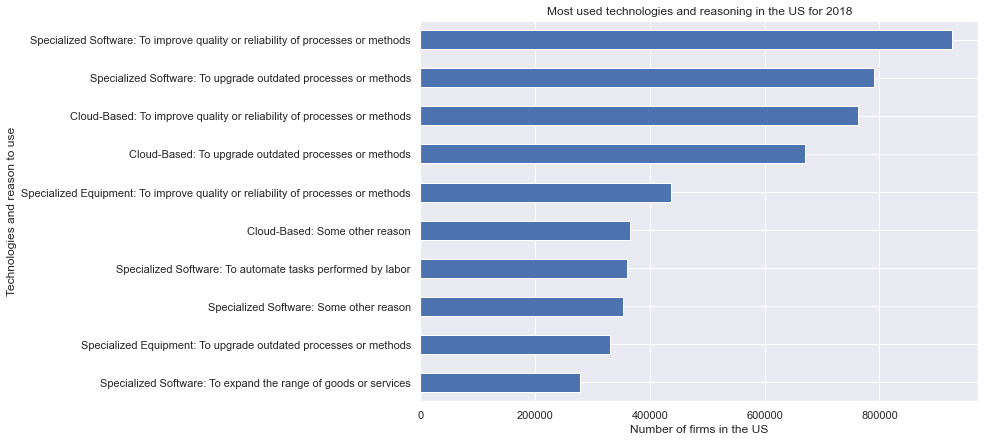

In [39]:
sns.set()
ax = temp[:10].plot(x='FIRMPDEMP', kind="barh")
sns.set(style="ticks")
plt.title('Most used technologies and reasoning in the US for 2018')
plt.xlabel('Number of firms in the US')
plt.ylabel('Technologies and reason to use')
plt.gca().invert_yaxis()
plt.show()

From here one, the 2 graphs are formed in the same way that the one above was, with the only difference being that they call different fields from the census API, in this case being 'MOTPRODTECH', 'MOTPRODTECH_LABEL'

In [40]:
# BUILDING BASE URL
url = 'https://api.census.gov/data'
year = '2018'
dataset = 'abstcb' # CHANGE THIS TO CHANGE DATASET
base_url = '/'.join([url, year, dataset])

# FORMATTING API REQUEST
predicates = {}
get_vars = ['FIRMPDEMP', 'MOTPRODTECH', 'MOTPRODTECH_LABEL'] # CHANGE THIS TO CHANGE VARIABLES RECEIVED
predicates['get'] = ','.join(get_vars)
predicates['for'] = 'us:*' # CHANGE THIS TO CHANGE GEOGRAPHIC SCOPE
predicates['key'] = '7c2c8ae1aefce7823680175cfa25d0ba300fe6f5' # DON'T CHANGE THIS

r = requests.get(base_url, params=predicates)
r

<Response [200]>

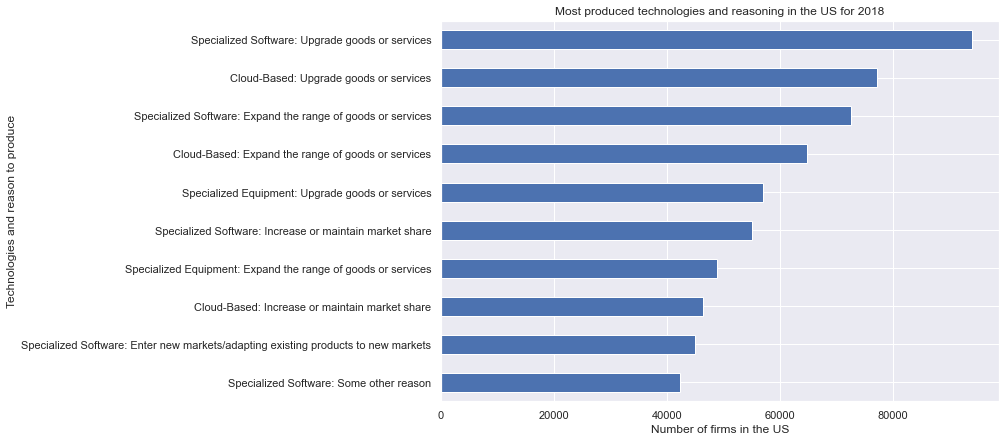

In [41]:
df = pd.DataFrame(columns=r.json()[0], data = r.json()[1:])
df["FIRMPDEMP"] = pd.to_numeric(df["FIRMPDEMP"])
df = df[df["MOTPRODTECH_LABEL"].str.contains("Total")==False]
df = df.sort_values(by=['FIRMPDEMP'], ascending=False)

temp = df.groupby(['MOTPRODTECH_LABEL']).agg({'FIRMPDEMP':'sum'})
temp = pd.to_numeric(temp['FIRMPDEMP'])
temp = temp.sort_values(ascending=False)

sns.set()
ax = temp[:10].plot(x='FIRMPDEMP', kind="barh")
sns.set(style="ticks")
plt.title('Most produced technologies and reasoning in the US for 2018')
plt.xlabel('Number of firms in the US')
plt.ylabel('Technologies and reason to produce')
plt.gca().invert_yaxis()
plt.show()

In [58]:
# BUILDING BASE URL
url = 'https://api.census.gov/data'
year = '2018'
dataset = 'abstcb' # CHANGE THIS TO CHANGE DATASET
base_url = '/'.join([url, year, dataset])

# FORMATTING API REQUEST
predicates = {}
get_vars = ['FIRMPDEMP', 'IMPACTWF_U', 'IMPACTWF_U_LABEL'] # CHANGE THIS TO CHANGE VARIABLES RECEIVED
predicates['get'] = ','.join(get_vars)
predicates['for'] = 'us:*' # CHANGE THIS TO CHANGE GEOGRAPHIC SCOPE
predicates['key'] = '7c2c8ae1aefce7823680175cfa25d0ba300fe6f5' # DON'T CHANGE THIS

r = requests.get(base_url, params=predicates)
r

<Response [200]>

In [59]:
df = pd.DataFrame(columns=r.json()[0], data = r.json()[1:])
df["FIRMPDEMP"] = pd.to_numeric(df["FIRMPDEMP"])
df = df[df["IMPACTWF_U_LABEL"].str.contains("Total")==False]
df = df[df["IMPACTWF_U_LABEL"].str.contains("Not applicable")==False]
df = df.sort_values(by=['FIRMPDEMP'], ascending=False)

temp = df.groupby(['IMPACTWF_U_LABEL']).agg({'FIRMPDEMP':'sum'})
temp = pd.to_numeric(temp['FIRMPDEMP'])
temp = temp.sort_values(ascending=False)

#df

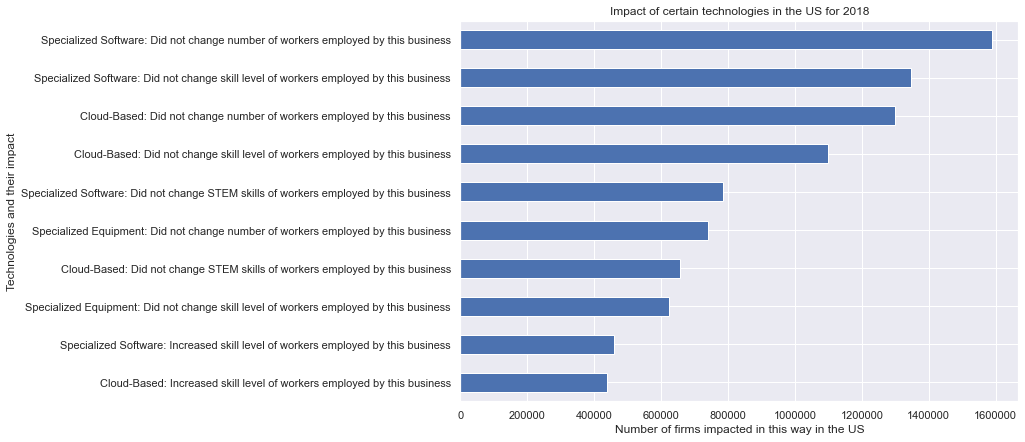

In [60]:
sns.set()
ax = temp[:10].plot(x='FIRMPDEMP', kind="barh")
ax.ticklabel_format(style='plain',  axis='x')
sns.set(style="ticks")
plt.title('Impact of certain technologies in the US for 2018')
plt.xlabel('Number of firms impacted in this way in the US')
plt.ylabel('Technologies and their impact')
plt.gca().invert_yaxis()
plt.show()

Below is an unused sample merge on arbitrarily selected data in order to fulfill the purposes of the rubric. The data is obtained and a separate dataframe is created for each of the 4 sample datasets of company summary, business characteristics, business owner characteristics and technology characteristics in the same was as earlier when creating the graphs, with only one difference in that these calls query the state datasets while the graphs are called on the total US datasets

In [53]:
# BUILDING BASE URL
url = 'https://api.census.gov/data'
year = '2018'
dataset = 'abstcb' # CHANGE THIS TO CHANGE DATASET
base_url = '/'.join([url, year, dataset])

# FORMATTING API REQUEST
predicates = {}
get_vars = ['NAME', 'IMPACTWF_U', 'IMPACTWF_U_LABEL'] # CHANGE THIS TO CHANGE VARIABLES RECEIVED
predicates['get'] = ','.join(get_vars)
predicates['for'] = 'state:*' # CHANGE THIS TO CHANGE GEOGRAPHIC SCOPE
predicates['key'] = '7c2c8ae1aefce7823680175cfa25d0ba300fe6f5' # DON'T CHANGE THIS

r = requests.get(base_url, params=predicates)
tech_df = pd.DataFrame(columns=r.json()[0], data = r.json()[1:])
#tech_df

In [54]:
# BUILDING BASE URL
url = 'https://api.census.gov/data'
year = '2018'
dataset = 'abscbo' # CHANGE THIS TO CHANGE DATASET
base_url = '/'.join([url, year, dataset])

# FORMATTING API REQUEST
predicates = {}
get_vars = ['NAME', 'OWNER_RACE', 'OWNER_RACE_LABEL'] # CHANGE THIS TO CHANGE VARIABLES RECEIVED
predicates['get'] = ','.join(get_vars)
predicates['for'] = 'state:*' # CHANGE THIS TO CHANGE GEOGRAPHIC SCOPE
predicates['key'] = '7c2c8ae1aefce7823680175cfa25d0ba300fe6f5' # DON'T CHANGE THIS

r = requests.get(base_url, params=predicates)
owner_df = pd.DataFrame(columns=r.json()[0], data = r.json()[1:])
#owner_df

In [55]:
# BUILDING BASE URL
url = 'https://api.census.gov/data'
year = '2018'
dataset = 'abscb' # CHANGE THIS TO CHANGE DATASET
base_url = '/'.join([url, year, dataset])

# FORMATTING API REQUEST
predicates = {}
get_vars = ['NAME', 'BUSCHAR', 'BUSCHAR_LABEL'] # CHANGE THIS TO CHANGE VARIABLES RECEIVED
predicates['get'] = ','.join(get_vars)
predicates['for'] = 'state:*' # CHANGE THIS TO CHANGE GEOGRAPHIC SCOPE
predicates['key'] = '7c2c8ae1aefce7823680175cfa25d0ba300fe6f5' # DON'T CHANGE THIS

r = requests.get(base_url, params=predicates)
buschar_df = pd.DataFrame(columns=r.json()[0], data = r.json()[1:])
#buschar_df

In [56]:
# BUILDING BASE URL
url = 'https://api.census.gov/data'
year = '2018'
dataset = 'abscs' # CHANGE THIS TO CHANGE DATASET
base_url = '/'.join([url, year, dataset])

# FORMATTING API REQUEST
predicates = {}
get_vars = ['NAME', 'YIBSZFI', 'YIBSZFI_LABEL'] # CHANGE THIS TO CHANGE VARIABLES RECEIVED
predicates['get'] = ','.join(get_vars)
predicates['for'] = 'state:*' # CHANGE THIS TO CHANGE GEOGRAPHIC SCOPE
predicates['key'] = '7c2c8ae1aefce7823680175cfa25d0ba300fe6f5' # DON'T CHANGE THIS

r = requests.get(base_url, params=predicates)
sum_df = pd.DataFrame(columns=r.json()[0], data = r.json()[1:])
#sum_df

Here is the actual merge itself, where the sets are inner joined on state and the only transformation is the dropping of the state column that comes with any calls to the state datasets

In [57]:
merged = sum_df.merge(buschar_df.drop('state', axis = 1), how='inner', on='NAME')
merged = merged.merge(owner_df.drop('state', axis = 1), how='inner', on='NAME')
merged = merged.merge(tech_df.drop('state', axis = 1), how='inner', on='NAME')
merged

,NAME,YIBSZFI,YIBSZFI_LABEL,state,BUSCHAR,BUSCHAR_LABEL,OWNER_RACE,OWNER_RACE_LABEL,IMPACTWF_U,IMPACTWF_U_LABEL
0,Mississippi,318,Firms with 2 to 3 years in business,28,A1,All firms,00,All owners of respondent firms,T1E05D01,Artificial Intelligence: Increased number of w...
1,Mississippi,318,Firms with 2 to 3 years in business,28,A1,All firms,00,All owners of respondent firms,T1E05D02,Artificial Intelligence: Decreased number of w...
2,Mississippi,318,Firms with 2 to 3 years in business,28,A1,All firms,00,All owners of respondent firms,T1E05D03,Artificial Intelligence: Did not change number...
3,Mississippi,318,Firms with 2 to 3 years in business,28,A1,All firms,00,All owners of respondent firms,T1E05D04,Artificial Intelligence: Increased skill level...
4,Mississippi,318,Firms with 2 to 3 years in business,28,A1,All firms,00,All owners of respondent firms,T1E05D05,Artificial Intelligence: Decreased skill level...
...,...,...,...,...,...,...,...,...,...,...
157075,Minnesota,323,Firms with 16 or more years in business,27,BZ,Item not reported,00,All owners of respondent firms,T3E11D10,"Specialized Software: Not applicable, did not ..."
157076,Minnesota,323,Firms with 16 or more years in business,27,BZ,Item not reported,00,All owners of respondent firms,T3E11D99,Specialized Software: Total Reporting
157077,Minnesota,323,Firms with 16 or more years in business,27,BZ,Item not reported,00,All owners of respondent firms,T4E14D01,Robotics: Increased number of workers employed...
157078,Minnesota,323,Firms with 16 or more years in business,27,BZ,Item not reported,00,All owners of respondent firms,T4E14D02,Robotics: Decreased number of workers employed...
